## **Name:** Fatima Zahid
## **CMS ID:** 294782

## **Back Propagation: Multi-label Classification**

## Importing Libraries

In [17]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

import keras 
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tqdm import tqdm


### Linking with Google drive to access the dataset

In [24]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


## Loading data from drive

In [25]:
data = pd.read_csv('/content/drive/My Drive/multilabel_modified/multilabel_classification.csv')
data.head()

,Image_Name,Classes,motorcycle,truck,boat,bus,cycle,sitar,ektara,flutes,tabla,harmonium
0,image1.jpg,bus,0,0,0,1,0,0,0,0,0,0
1,image2.jpg,sitar,0,0,0,0,0,1,0,0,0,0
2,image3.jpg,flutes,0,0,0,0,0,0,0,1,0,0
3,image4.jpg,bus,0,0,0,1,0,0,0,0,0,0
4,image5.jpg,bus,0,0,0,1,0,0,0,0,0,0


In [26]:
data.columns

Index(['Image_Name', 'Classes', 'motorcycle', 'truck', 'boat', 'bus', 'cycle',
       'sitar', 'ektara', 'flutes', 'tabla', 'harmonium'],
      dtype='object')

## Training images with the given labels

In [27]:
train_image = []
#for i in tqdm(range(data.shape[0])):
for i in tqdm(range(data.shape[0])):
    img = image.load_img('/content/drive/My Drive/multilabel_modified/images/'+data['Image_Name'][i],target_size=(300,300,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 3000/3000 [00:44<00:00, 68.04it/s]


In [29]:
X.shape

(3000, 300, 300, 3)

## Labelling Images  through one hot encoding

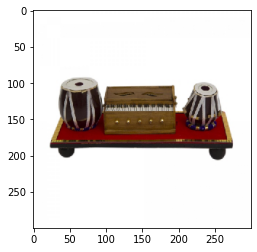

In [47]:
plt.imshow(X[2005])

In [48]:
data['Classes'][2005]

'  tabla harmonium'

In [32]:
y = np.array(data.drop(['Image_Name', 'Classes'],axis=1))
y.shape

(3000, 10)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)

In [34]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape = (300,300,3)),
  keras.layers.Dense(128,activation = 'sigmoid'),   # hidden layer
  keras.layers.Dense(64,activation = 'sigmoid'),   # hidden layer
  keras.layers.Dense(10,activation = 'sigmoid'),   # output layer
])

# compiling the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [35]:
history = model.fit(X_train, y_train, epochs=15, batch_size=32)

Epoch 1/15
75/75 [==============================] - 21s 266ms/step - loss: 0.3418 - accuracy: 0.3425
Epoch 2/15
75/75 [==============================] - 15s 204ms/step - loss: 0.2886 - accuracy: 0.3708
Epoch 3/15
75/75 [==============================] - 15s 203ms/step - loss: 0.2875 - accuracy: 0.3708
Epoch 4/15
75/75 [==============================] - 19s 252ms/step - loss: 0.2871 - accuracy: 0.3708
Epoch 5/15
75/75 [==============================] - 16s 207ms/step - loss: 0.2867 - accuracy: 0.3708
Epoch 6/15
75/75 [==============================] - 15s 204ms/step - loss: 0.2866 - accuracy: 0.3708
Epoch 7/15
75/75 [==============================] - 18s 237ms/step - loss: 0.2865 - accuracy: 0.3708
Epoch 8/15
75/75 [==============================] - 15s 205ms/step - loss: 0.2869 - accuracy: 0.3708
Epoch 9/15
75/75 [==============================] - 15s 205ms/step - loss: 0.2868 - accuracy: 0.3708
Epoch 10/15
75/75 [==============================] - 18s 237ms/step - loss: 0.2866 - accura

In [36]:
y_pred = model.predict(X_test)

19/19 [==============================] - 1s 64ms/step


In [37]:
evaluation = model.evaluate(X_test, y_test)

19/19 [==============================] - 1s 65ms/step - loss: 0.2929 - accuracy: 0.3333


In [38]:
print(model.metrics_names)
print(evaluation)

['loss', 'accuracy']
[0.29289335012435913, 0.3333333432674408]
